In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

both_coorporate_utility = 1
both_defect_utility = 1
looser_utility = -4
winner_utility = 4

a_resources = [10]
b_resources = [10]

a_actions = []
b_actions = []

a_utility = []
b_utility = []

rounds = 100

In [2]:
# Defect: action 0
# Cooperate: action 1

def evaluate_strategy(a, b):
    if(a == 1 and b == 1): # both coorporate
        return(both_coorporate_utility, both_coorporate_utility)
    elif(a == 1 and b == 0): # a coorporate, b defect
        return(looser_utility, winner_utility)
    elif(a == 0 and b == 1): # a defect, be coorporate
        return(winner_utility, looser_utility)
    elif(a == 0 and b == 0): # both defect
        return(both_defect_utility, both_defect_utility)

In [3]:
def tit_for_tat(me, opponent, t):
    if(t == 0):
        return(1)
    return(opponent[t-1])

In [4]:
# play the game the defined amount of rounds, stop if anyones resources are less than 0
for t in range(rounds):
    if(a_resources[-1] <= 0 or b_resources[-1] <= 0):
        break
    a_strategy = tit_for_tat(a_actions, b_actions, t)
    b_strategy = round(np.random.rand()) # random strategy
    a_actions.append(a_strategy) # store strategy
    b_actions.append(b_strategy) # store strategy
    if(a_strategy == 0):
        a_tmp = a_resources[-1] - 1 # if action is war, pay war fee
    else:
        a_tmp = a_resources[-1] # otherwise temporarily store the last score
    if(b_strategy == 0):
        b_tmp = b_resources[-1] - 1 # if action is war, pay war fee
    else:
        b_tmp = b_resources[-1] # otherwise temporarily store the last score
    [a_result, b_result] = evaluate_strategy(a_strategy, b_strategy) # evaluate the strategies and get the game result
    a_utility.append(a_result) # store the result over time
    b_utility.append(b_result) 
    
    a_resources.append(a_tmp + a_result) # get the accumulated resources
    b_resources.append(b_tmp + b_result)

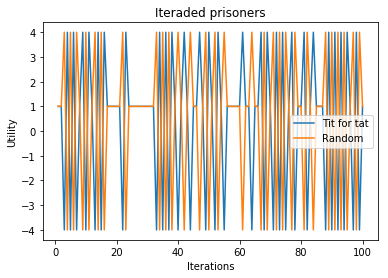

In [5]:
ax = plt.subplot(1,1,1)
ax.plot(np.linspace(1,len(a_utility), len(a_utility)), a_utility, label='Tit for tat')
ax.plot(np.linspace(1,len(b_utility), len(b_utility)), b_utility, label='Random')
ax.set_title('Iteraded prisoners')
ax.set_xlabel('Iterations')
ax.set_ylabel('Utility')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

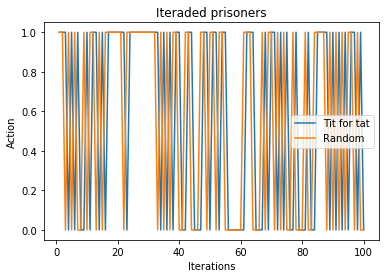

In [6]:
ax = plt.subplot(1,1,1)
ax.plot(np.linspace(1,len(a_actions), len(a_actions)), a_actions, label='Tit for tat')
ax.plot(np.linspace(1,len(b_actions), len(b_actions)), b_actions, label='Random')
ax.set_title('Iteraded prisoners')
ax.set_xlabel('Iterations')
ax.set_ylabel('Action')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()

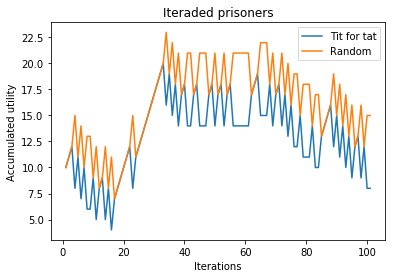

In [7]:
ax = plt.subplot(1,1,1)
ax.plot(np.linspace(1,len(a_resources), len(a_resources)), a_resources, label='Tit for tat')
ax.plot(np.linspace(1,len(b_resources), len(b_resources)), b_resources, label='Random')
ax.set_title('Iteraded prisoners')
ax.set_xlabel('Iterations')
ax.set_ylabel('Accumulated utility')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.show()